In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [2]:
data= pd.read_csv('dataset diabetes.csv')
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Summary statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# EDA (Exploratory Data Analysis)

In [4]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
#data = data.drop_duplicates()

Number of duplicate rows: 0


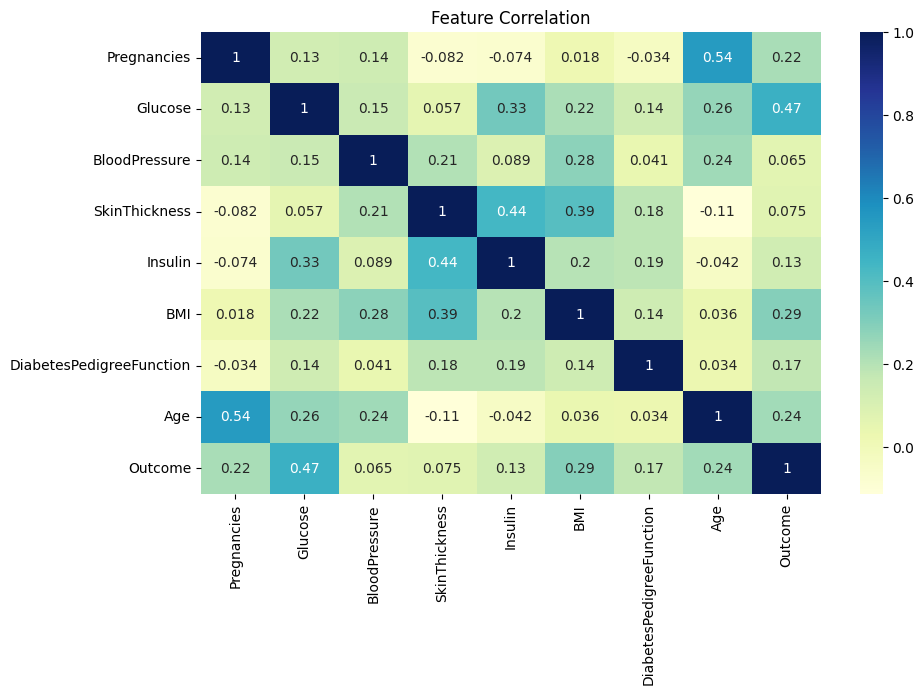

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation")
plt.show()

In [7]:
#Check for missing or zero values
missing_values = (data == 0).sum()
print("Missing/Zero values:\n", missing_values)

Missing/Zero values:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
# Data Preprocessing
# Splitting features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [14]:
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    train_accuracy = accuracy_score(y_train, model.predict(X_train))  # Training accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))    # Testing accuracy
    
    # Calculate the difference between training and testing accuracy
    accuracy_gap = train_accuracy - test_accuracy
    
    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Accuracy Gap": accuracy_gap
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Model Comparison:\n")
print(results_df)

# Identify the best model based on testing accuracy
best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]
print(f"\nThe best model is: {best_model['Model']} with a testing accuracy of {best_model['Test Accuracy']:.2f}")

Model Comparison:

                    Model  Train Accuracy  Test Accuracy  Accuracy Gap
0     Logistic Regression        0.770358       0.753247      0.017112
1           Random Forest        1.000000       0.746753      0.253247
2     K-Nearest Neighbors        0.824104       0.694805      0.129299
3  Support Vector Machine        0.833876       0.733766      0.100110
4       Gradient Boosting        0.938111       0.740260      0.197851

The best model is: Logistic Regression with a testing accuracy of 0.75
